In [26]:
import pandas as pd

In [27]:
df = pd.read_csv("/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv")
print(df.shape)
print(df.columns)

(6362620, 11)
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [32]:
df[df["isFraud"] == 1][:5]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [3]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = pd.factorize(df[col])[0]

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
import pandas as pd

# Suponiendo que ya tienes tu DataFrame 'df'
correlation_matrix = df.corr()

print(correlation_matrix["isFraud"])

step              0.031578
type             -0.004463
amount            0.076688
nameOrig          0.020752
oldbalanceOrg     0.010154
newbalanceOrig   -0.008148
nameDest          0.025310
oldbalanceDest   -0.005885
newbalanceDest    0.000535
isFraud           1.000000
isFlaggedFraud    0.044109
Name: isFraud, dtype: float64


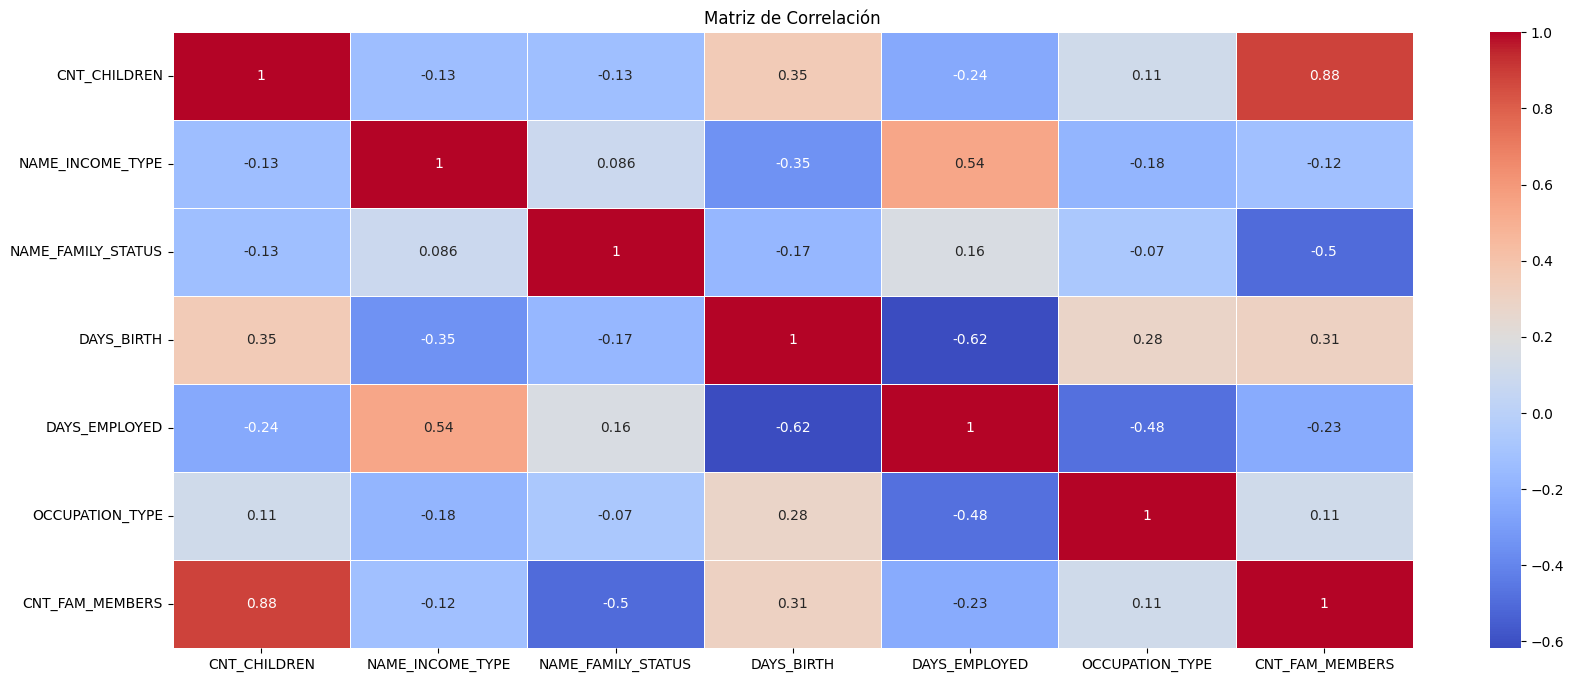

In [64]:
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [17]:
df = df.drop(columns = ["nameDest", "nameOrig", "step"])

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
from sklearn.ensemble import ExtraTreesClassifier

In [7]:
df = df[:1000]

In [18]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Definir los algoritmos de clasificación
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Extra trees": ExtraTreesClassifier(n_estimators=10)
}

In [20]:
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_proba = clf.predict_proba(X_test_scaled)[:, 1]
    print(f"Nombre: {name}\nAccuracy:{accuracy_score(y_test, y_pred)}\n\n")


Nombre: Logistic Regression
Accuracy:0.9933333333333333


Nombre: Decision Tree
Accuracy:0.98


Nombre: Random Forest
Accuracy:0.9933333333333333


Nombre: Support Vector Machine
Accuracy:0.9933333333333333


Nombre: K-Nearest Neighbors
Accuracy:0.9933333333333333


Nombre: Naive Bayes
Accuracy:0.84


Nombre: Gradient Boosting
Accuracy:0.9933333333333333


Nombre: Extra trees
Accuracy:0.9966666666666667




In [22]:
import json
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo
model = LogisticRegression()
model.fit(X, y)

y_pred = clf.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))

0.9966666666666667


In [24]:
len(model.coef_.tolist()[0])

7

In [25]:

# Extraer los parámetros del modelo
model_params = {
    "coef_": model.coef_.tolist(),      # Coeficientes del modelo
    "intercept_": model.intercept_.tolist(),  # Intercepto del modelo
    "classes_": model.classes_.tolist()  # Clases (en caso de clasificación multiclase)
}

# Guardar los parámetros en un archivo JSON
with open("/kaggle/working/logistica.json", "w") as json_file:
    json.dump(model_params, json_file)
print("Modelo guardado en logistic_model.json")


Modelo guardado en logistic_model.json
